# Task 1: Prediction using Supervised ML 
## (Data Science and Business Analytics internship)
## GRIP: The Sparks Foundation

### By Sunayna Padhye

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
url = "http://bit.ly/w-data"
allData = pd.read_csv(url)

**EDA**

In [31]:
print(allData.shape)
allData.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [49]:
allData.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [50]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


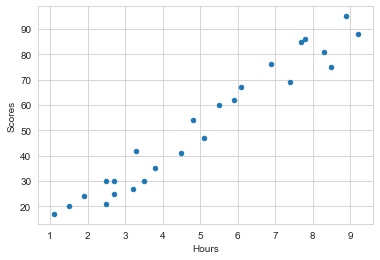

In [51]:
allData.plot(kind='scatter', x='Hours', y='Scores')
plt.show()

In [52]:
allData.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [53]:
allData.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


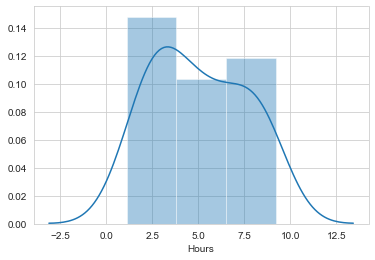

In [54]:
hours = allData['Hours']
scores = allData['Scores']
sns.distplot(hours)

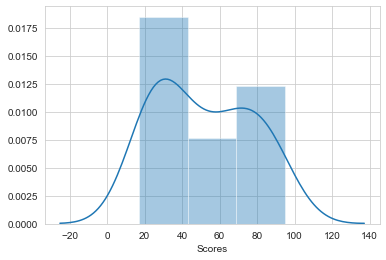

In [55]:
sns.distplot(scores)

**Simple Linear Regression**

In [56]:
x = allData.iloc[:, :-1].values
y = allData.iloc[:, 1].values

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 50)

In [58]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

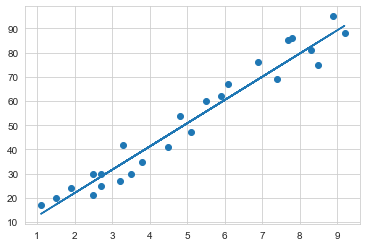

In [59]:
m = reg.coef_
c = reg.intercept_
line = m*x+c
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

In [60]:
y_pred = reg.predict(x_test)

In [61]:
actual_predicted = pd.DataFrame({'Target':y_test, 'Predicted': y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


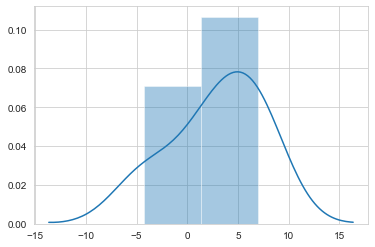

In [62]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [66]:
hr = 9.25
sc = reg.predict([[hr]])
print("A student studying {} hrs per day will score {}% in exam.".format(hr, sc))

A student studying 9.25 hrs per day will score [91.56986604]% in exam.


In [67]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942


In [68]:
print("Thank You!")

Thank You!
